## Data import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sales=pd.read_csv("E://JN//Python Foundation Case Study 4 - Python Visualization Case Study//Case Study 4 - Python Visualizations Case Study//SalesData.csv")

In [9]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [13]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [15]:
sales.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

## 1. Compare Sales by region for 2016 with 2015 using bar chart

In [20]:
sales_region =sales.groupby('Region')[['Sales2015','Sales2016']].sum()
sales_region

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


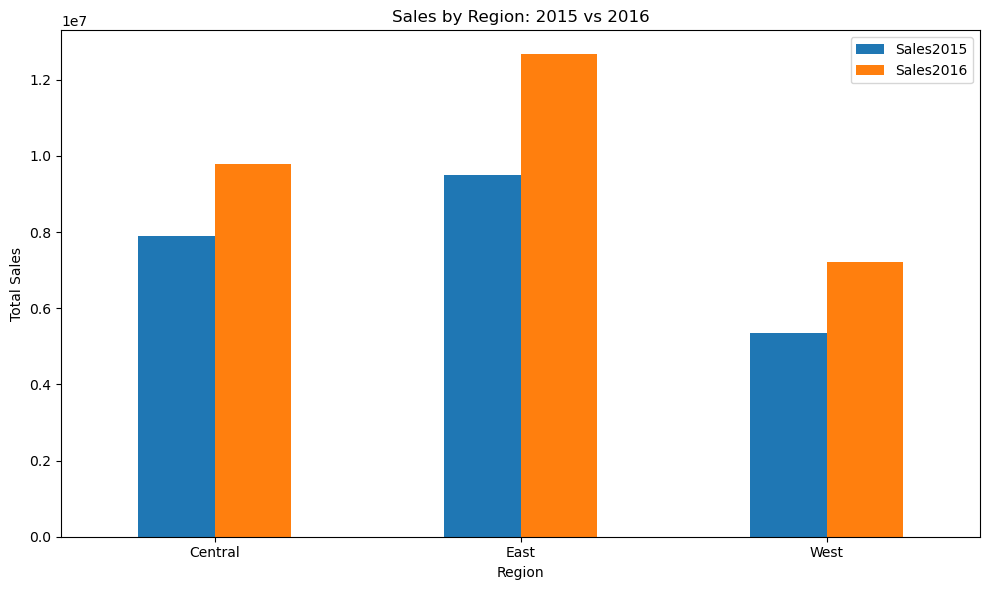

In [24]:
sales_region.plot(kind='bar', figsize=(10, 6), title='Sales by Region: 2015 vs 2016')
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [31]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [59]:
pie = sales.groupby('Region')['Sales2016'].sum()
pie

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

In [61]:
pie.head()

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

In [63]:
pie.isna().sum()

0

In [65]:
pie.dropna

<bound method Series.dropna of Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64>

In [57]:
pie.dtypes

Sales2016    float64
dtype: object

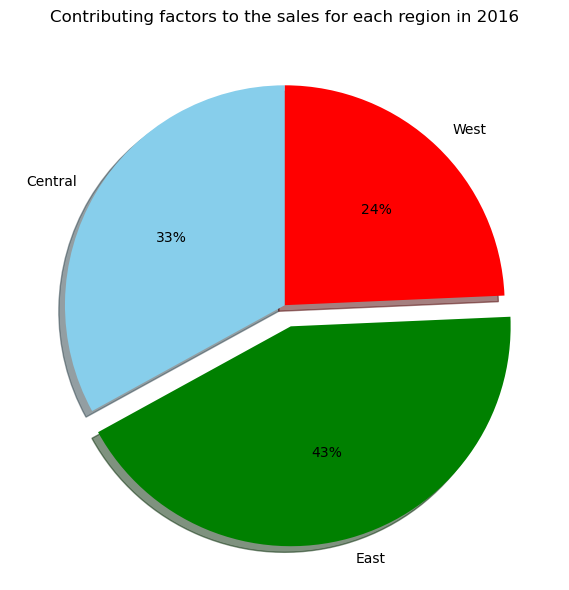

In [108]:
plt.figure(figsize=(6, 6))
plt.pie(pie, labels=pie.index, autopct='%1.0f%%', startangle=90,shadow=True,explode=[0.0,0.1,0.0],colors=['skyblue','green','red'])
plt.title(f'Contributing factors to the sales for each region in 2016')
plt.tight_layout()
plt.show()


## 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [116]:
sales_region_tier = sales.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum()
sales_region_tier

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

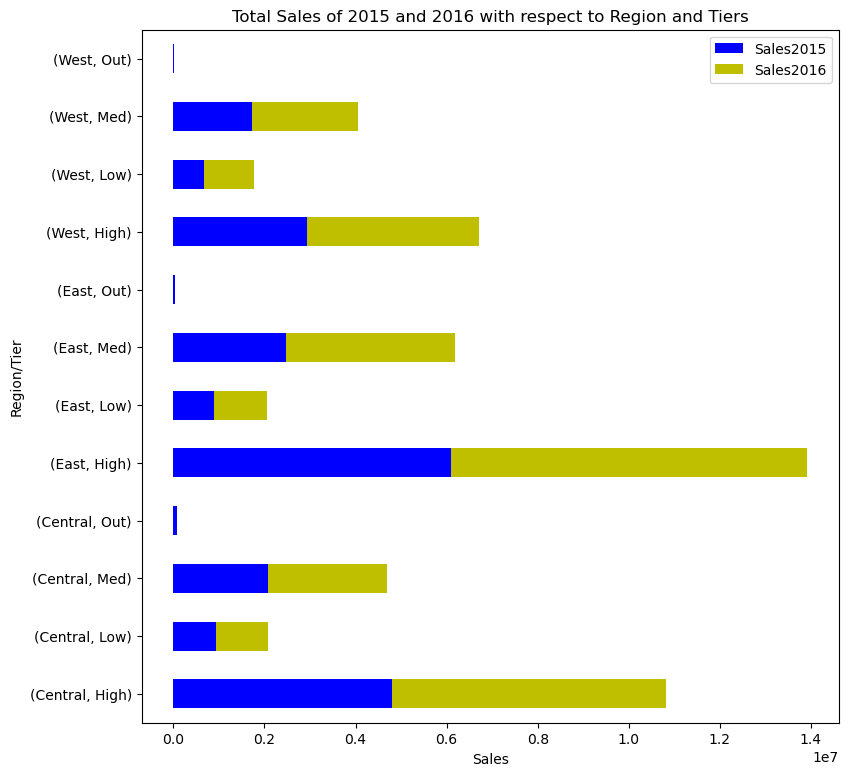

In [130]:
sales_region_tier.plot(kind='barh',stacked=True,figsize=(9,9),color=["b","y"])
plt.xlabel('Sales')
plt.ylabel('Region/Tier')
plt.title('Total Sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

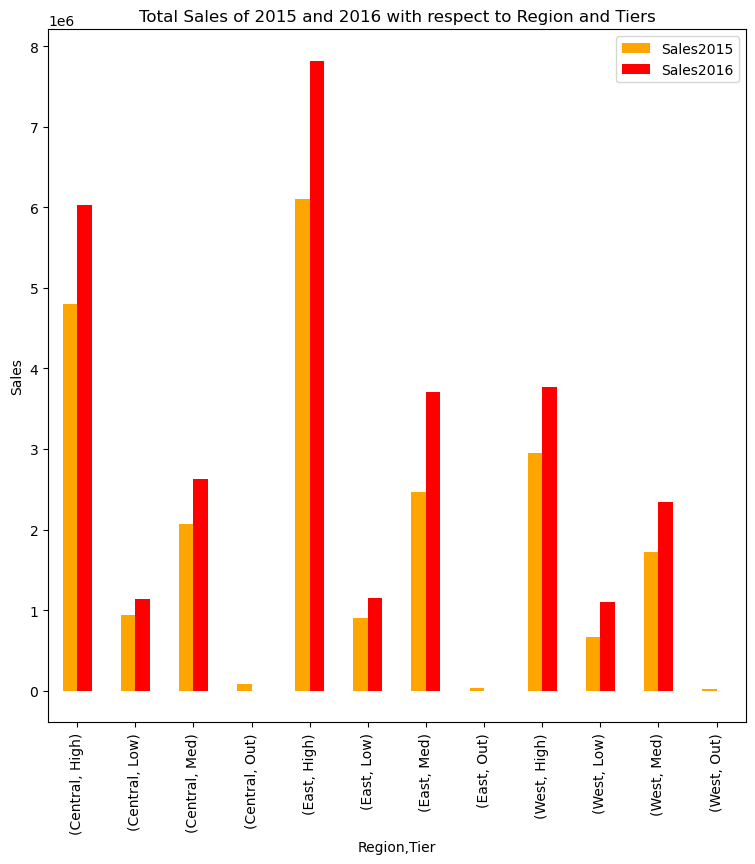

In [134]:
sales_region_tier.plot(kind='bar',figsize=(9,9),color=["orange","red"])
plt.ylabel('Sales')
plt.title('Total Sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

## 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [141]:
sales.head(10)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


In [145]:
state =sales.groupby(['Region','State'])[['Sales2015','Sales2016']].sum()
state

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843073e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836730e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046537e+05
        IA     1.022714e+05  1.461604e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850208e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530734e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [147]:
east= state.loc['East']
east

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


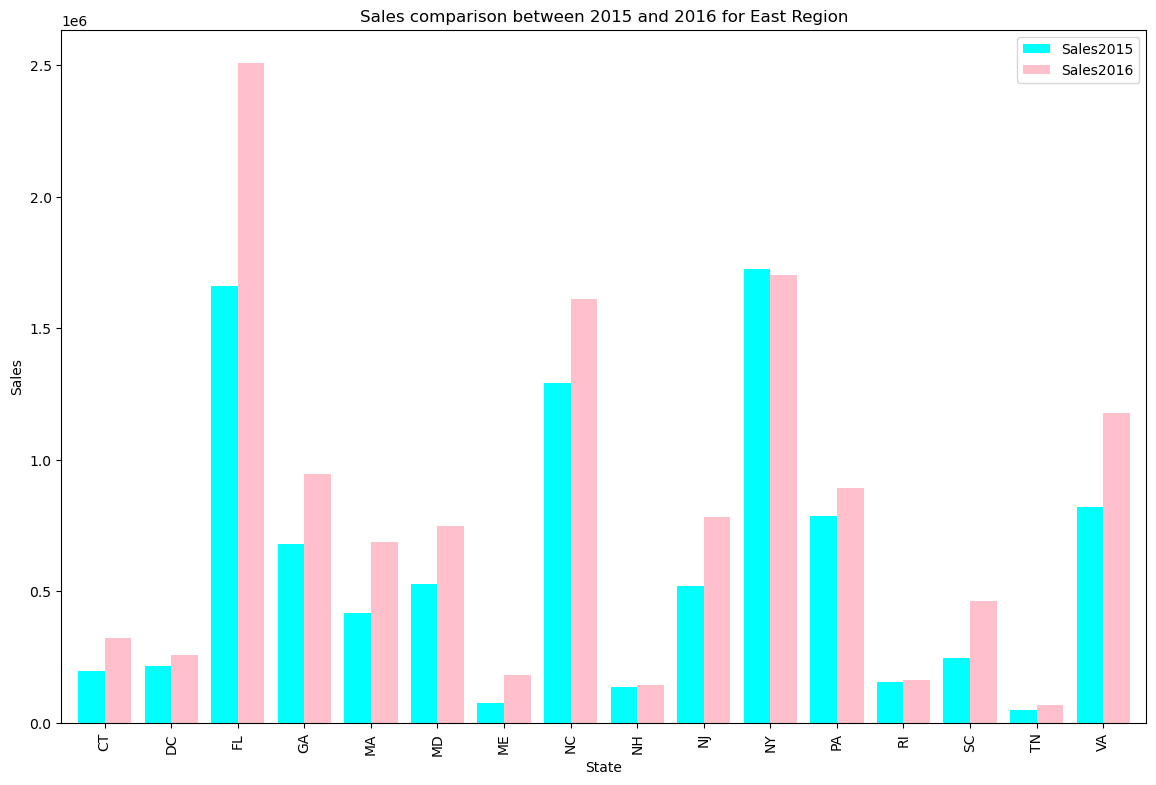

In [159]:
east.plot(kind='bar',figsize=(14,9),width=0.8,color=["cyan","pink"])
plt.ylabel("Sales")
plt.title('Sales comparison between 2015 and 2016 for East Region')
plt.show()

## 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015

In [164]:
sales.head(10)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


In [166]:
div=sales.groupby(['Tier','Division'])[['Units2015','Units2016']].sum()
div

Units2015  Units2016
Tier Division                           
High BIG APPLE       180.8330   231.0000
     CHARGERS        123.6666   164.4999
     CONGRESSIONAL   164.5003   205.0000
     DIAMONDBACK     153.3334   176.6667
     EMPIRE          414.3332   449.3332
...                       ...        ...
Out  SYNERGY           3.0000     0.0000
     THE CAROLINAS     2.0000     0.0000
     VICTORY           1.0000     0.0000
     WOLVERINE         1.0000     0.0000
     WRANGLER         13.0000     0.0000

[96 rows x 2 columns]

In [168]:
high_tier = div.loc['High']
high_tier

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


<Axes: xlabel='Division'>

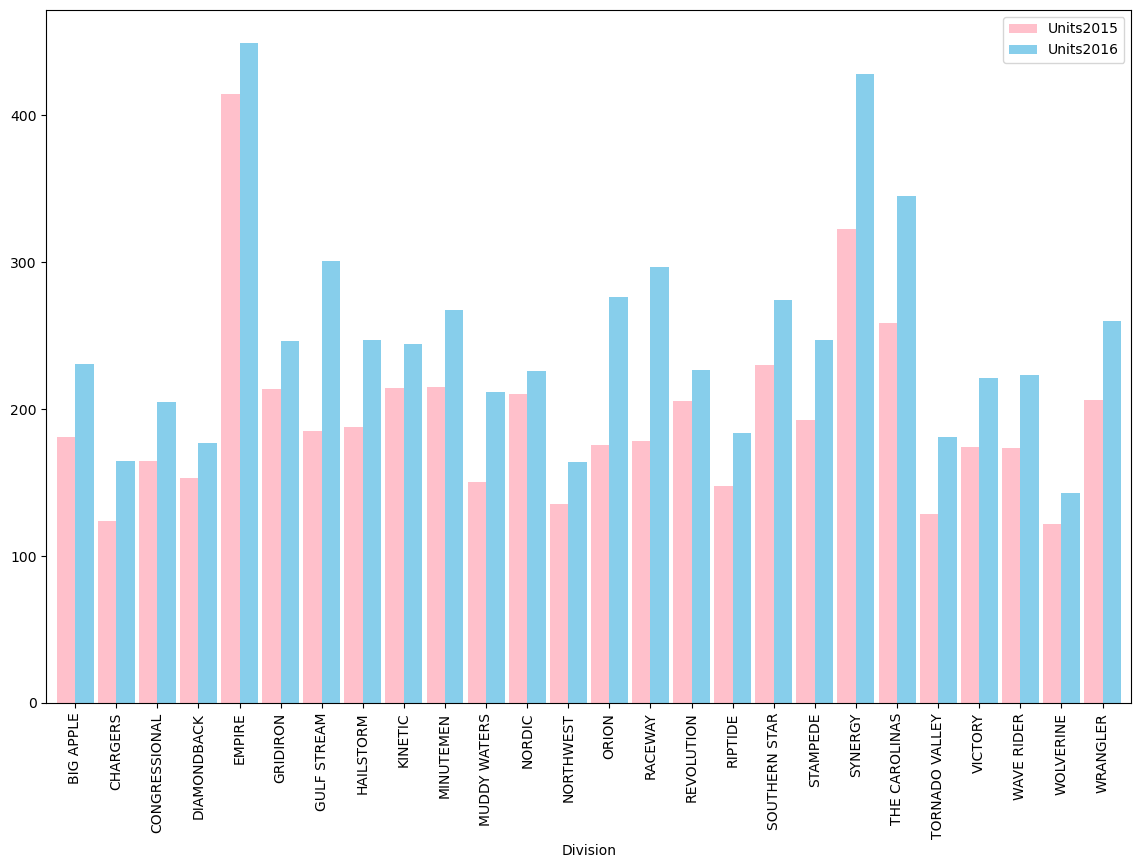

In [178]:
high_tier.plot(kind='bar',figsize=(14,9),width=0.9,color=["pink","skyblue"])

## 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as • Jan - Mar : Q1 • Apr - Jun : Q2 • Jul - Sep : Q3 • Oct - Dec : Q4   


In [181]:
sales['Qtr'] = np.where(sales['Month'].isin(['Jan', 'Feb', 'Mar']), 'Q1',
                np.where(sales['Month'].isin(['Apr', 'May', 'Jun']), 'Q2',
                np.where(sales['Month'].isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))

In [185]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [197]:
sales.Qtr.head()

0    Q3
1    Q4
2    Q2
3    Q1
4    Q3
Name: Qtr, dtype: object

## 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [204]:
Qtr_sales=sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()

In [206]:
Qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


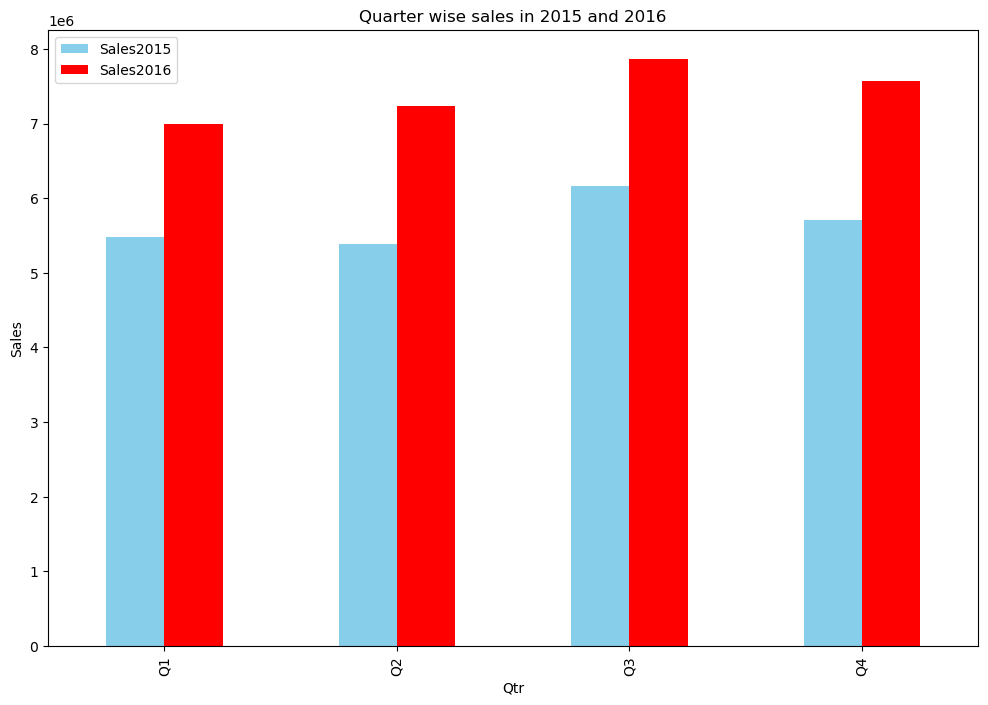

In [222]:
Qtr_sales.plot(kind='bar',figsize=(12,8),color=["skyblue","red"])
plt.ylabel('Sales')
plt.title('Quarter wise sales in 2015 and 2016')
plt.show()

## 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [225]:
qtr_pivot=sales.pivot_table(index='Qtr',columns='Tier',values='Sales2016')
qtr_pivot

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


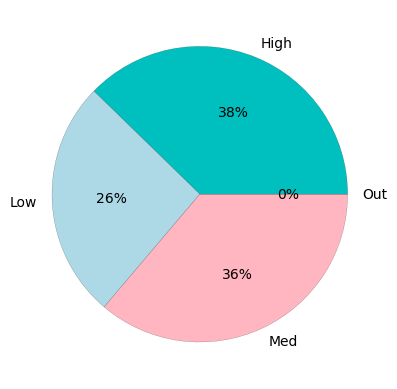

In [279]:
# for Q1
plt.pie(x=qtr_pivot.loc["Q1",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['c', 'lightblue', 'lightpink'], wedgeprops={'edgecolor': 'black', 'linewidth': 0.1})
plt.show()

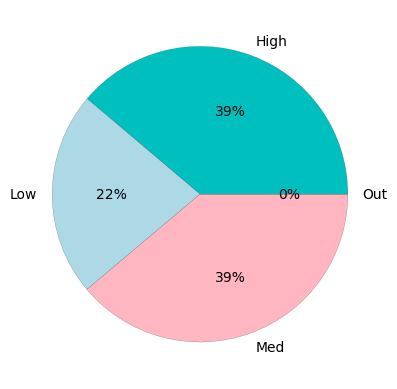

In [277]:
#for Q2
plt.pie(x=qtr_pivot.loc["Q2",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['c', 'lightblue', 'lightpink'], wedgeprops={'edgecolor': 'black', 'linewidth': 0.1})
plt.show()

In [241]:
# value Q3
qtr_pivot.loc["Q3"]

Tier
High    9334.404693
Low     5446.422671
Med     8197.976091
Out     -360.947778
Name: Q3, dtype: float64

In [239]:
print(" The Q3 have negative values as out, which we replace it with ZERO for Visualization in the pie chart")

 The Q3 have negative values as out, which we replace it with ZERO for Visualization in the pie chart


In [243]:
q3 = qtr_pivot.loc["Q3", :].clip(lower=0)

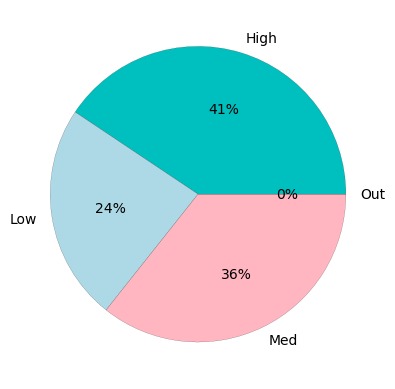

In [275]:
plt.pie(x=q3,autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['c', 'lightblue', 'lightpink'], wedgeprops={'edgecolor': 'black', 'linewidth': 0.1})
plt.show()

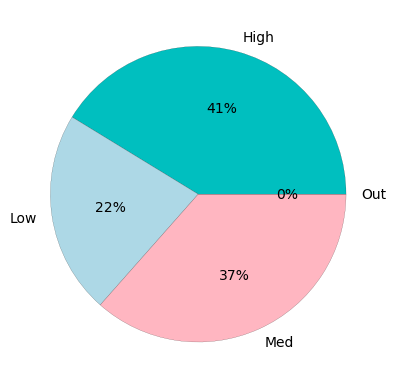

In [273]:
#for Q4
plt.pie(x=qtr_pivot.loc["Q4",:],autopct="%1.0f%%",labels=["High","Low","Med","Out"],colors=['c', 'lightblue', 'lightpink'], wedgeprops={'edgecolor': 'black', 'linewidth': 0.1})
plt.show()